# Bar graph

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

In [2]:
def get_df(yr):
    return pd.read_csv('../inputs/Environmental_Data_Deep_Moor_{}.csv'.format(yr))

In [3]:
def get_seasons(yr):
    df = get_df(yr)
    return [df[df['date'].between('{}_03_20'.format(yr),'{}_06_19'.format(yr))],
            df[df['date'].between('{}_06_20'.format(yr),'{}_09_21'.format(yr))],
            df[df['date'].between('{}_09_22'.format(yr),'{}_12_20'.format(yr))],
            df[~df['date'].between('{}_03_20'.format(yr),'{}_12_20'.format(yr))]]

In [4]:
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')]

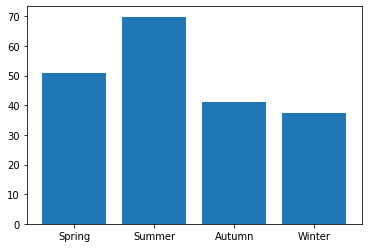

In [5]:
plt.bar(seasons, heights)
plt.show()

In [6]:
alphas = [height/max(heights) for height in heights]
colours = [(.1,.7,.2,a) for a in alphas]

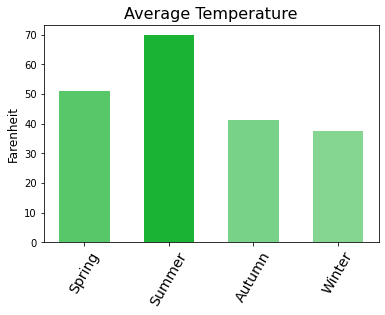

In [7]:
plt.bar(seasons, heights, .6, color=colours)
plt.ylabel('Farenheit', fontsize=12)
plt.title('Average Temperature', fontsize=16)
plt.xticks(rotation=60, fontsize=14)
plt.show()

In [8]:
heights14 = [season['Air_Temp'].mean() for season in get_seasons('2014')]
alphas14 = [height/max(heights) for height in heights14]
colours14 = [(.2,.1,.7,a) for a in alphas14]

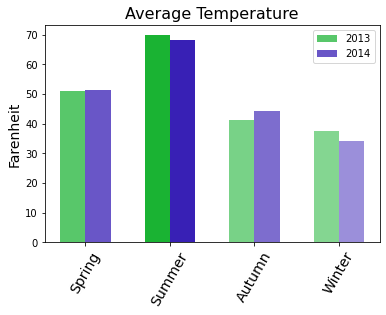

In [9]:
index = np.arange(len(seasons))
fig, ax = plt.subplots()
rects1 = ax.bar(index, heights, .3, color=colours, label='2013')
rects2 = ax.bar(index+.3, heights14, .3, color=colours14, label='2014')
ax.legend()
plt.ylabel('Farenheit', fontsize=14)
plt.title('Average Temperature', fontsize=16)
ax.set_xticks(index+.15)
ax.set_xticklabels(seasons)
plt.xticks(rotation=60, fontsize=14)
plt.show()

In [10]:
# add tables with min and max temperature
def max_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].max()]

def min_temp(s):
    return s[s['Air_Temp']==s['Air_Temp'].min()]

def min_max_temps(yr):
    return [(max_temp(s)['Air_Temp'].values[0],
             max_temp(s)['date'].values[0],
             min_temp(s)['Air_Temp'].values[0],
             min_temp(s)['date'].values[0]
           ) for s in get_seasons(yr)]

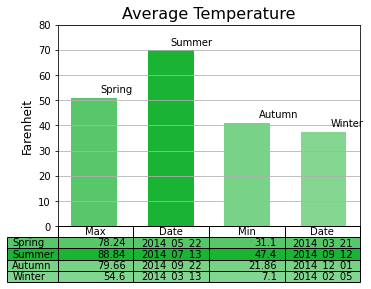

In [11]:
plt.bar(seasons, heights, .6, align='center', color=colours)
plt.ylabel('Farenheit', fontsize=12)
plt.title('Average Temperature', fontsize=16)
plt.xticks(rotation=60, fontsize=14)
columns = ['Max', 'Date', 'Min', 'Date']
plt.table(cellText=min_max_temps('2014'), 
          rowLabels=seasons, 
          colLabels=columns,
          rowColours=colours,
          cellColours=[[c]*4 for c in colours],
          loc='bottom')
plt.grid(True)
plt.ylim(0,80)
plt.subplots_adjust(left=.2, bottom=.1, top=.8)
plt.xticks([])
[plt.text(i,h+2,s) for i,h,s in zip([.08,1,2.15,3.1], heights, seasons)]
plt.show()